<h5>Here is done in this file the biggest part of the project which is analyzing the data and mining it.</h5>

In [1]:
import pandas as pd
from lyrics_extractor import extract_all_artist

df = extract_all_artist()
df = df.set_index('title')
df

,artist,lyrics
title,,
Akta mannen,1.Cuz,"Akta mannen Lyrics[Refräng]\nHar DJ med mig, a..."
AKTA MANNEN (Remix),1.Cuz,AKTA MANNEN (Remix) Lyrics[Intro]\nWahzaa\nYei...
RÄKNA MINA DAGAR,1.Cuz,RÄKNA MINA DAGAR Lyrics[Intro: 1.Cuz]\nKänns s...
FIENDES FIENDE,1.Cuz,FIENDES FIENDE Lyrics[Intro: 1.Cuz]\nDet kan v...
Swedens Most Wanted,1.Cuz,Swedens Most Wanted Lyrics[Intro]\nHehe (Grrr)...
...,...,...
Utomlands,Zacke,Utomlands Lyrics[Intro: Peter Morén]\nDet är s...
Kommer hem,Zacke,Kommer hem Lyrics[Vers 1: Zacke]\nFuckar upp a...
Göra upp en eld,Zacke,"Göra upp en eld Lyrics[Vers 1, Zacke]\nÄlskar ..."


In [2]:
df.value_counts('artist')

artist
1.Cuz                10
Promoe               10
Looptroop Rockers    10
Mange Schmidt        10
Maskinen             10
Medina               10
Mohammed Ali         10
Movits!              10
Newkid               10
Näääk (SWE)          10
Petter               10
Roffe Ruff           10
ADAAM                10
STOR                 10
Silvana Imam         10
Snook                10
Svenska Akademien    10
The Latin Kings      10
Thomas Rusiak        10
Timbuktu             10
VC Barre             10
Yasin                10
Linda Pira           10
Lilla Namo           10
Lazee                10
Labyrint             10
Adam Tensta          10
Afasi & Filthy       10
Ant Wan              10
Cleo (SWE)           10
Dani M               10
Dree Low             10
Ecco2k               10
Einár                10
Fronda               10
Greekazo             10
Hov1                 10
Infinite Mass        10
Just D               10
Kartellen            10
Ken Ring             10
Zacke    

*We see that for some artists (StoneFunkers, Kumba, Jiggz, Highwon and Addis Black Widow) we couldn't collect 10 songs beause they provided less number of songs on www.genius.com.*

*I could have drop these artists from the dataframe to get a really smooth data distribution, however, i'm interested to see how this data points are going to be computed by the program, so i decided to let these artists in the dataset.*

In [3]:
import spacy

nlp_sv = spacy.load("sv_core_news_lg")
nlp_en = spacy.load("en_core_web_lg")
#nlp_multi = spacy.load("xx_sent_ud_sm")

spacy_en_stopwords = spacy.lang.en.stop_words.STOP_WORDS
spacy_sv_stopwords = spacy.lang.sv.stop_words.STOP_WORDS

# concatenate both stopwords sets
spacy_en_stopwords.update(spacy_sv_stopwords)

# #Add contextual stopwords to our stopwords list.
custom_stopwords = {"refräng","brygga", "vers", "lyrics", "intro", "outro"}
spacy_en_stopwords.update(custom_stopwords)

def preprocess_text(text):

    #REMOVING THE FIRST LINE
    text = text.split('\n', 1)[1]

    #TOKENISATION
    tokens =[]
    for token in nlp_sv(text):
        tokens.append(token)

    #REMOVING STOP WORDS
    sentence =  [word.lower_ for word in tokens if (word.text.isalpha() and word.text not in spacy_en_stopwords and len(word.text) > 2 )]

    return sentence

In [4]:
df['lyrics'] = [preprocess_text(text) for text in df['lyrics']]
df['len(lyrics)'] = [len(lyrics) for lyrics in df['lyrics']]

In [5]:
df

,artist,lyrics,len(lyrics)
title,,,
Akta mannen,1.Cuz,"[har, akta, mannen, akta, mannen, akta, mannen...",270
AKTA MANNEN (Remix),1.Cuz,"[wahzaa, yei, gonzalez, refräng, einár, har, a...",348
RÄKNA MINA DAGAR,1.Cuz,"[känns, hatar, gatan, hataren, hatar, massa, h...",247
FIENDES FIENDE,1.Cuz,"[det, tufft, magen, känner, nånting, lurt, dra...",222
Swedens Most Wanted,1.Cuz,"[hehe, grrr, shhh, grrr, dnoteondabeat, yeah, ...",144
...,...,...,...
Utomlands,Zacke,"[det, himmel, tittar, kan, blå, låtsas, utomla...",211
Kommer hem,Zacke,"[fuckar, allting, ställer, volontär, sluta, lä...",288
Göra upp en eld,Zacke,"[älskar, bränner, älskar, bränner, hur, älska,...",216


<AxesSubplot: xlabel='len(lyrics)', ylabel='Count'>

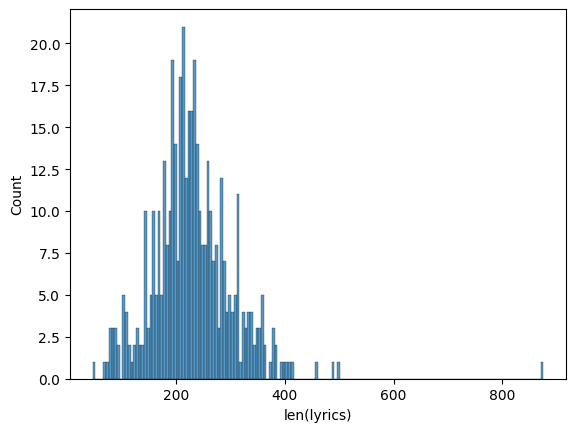

In [6]:
import seaborn as sns
sns.histplot(data=df, x="len(lyrics)", binwidth=5)

*Here we see that our distribution is centered around a value of 200 words by songs (not unique words, without english and swedish stop words, without words with 2 letters or less), we see a song with more than 1000 words, it's normal because this song has a duration of more than 8 minutes with more than 10 singers singing on it.*

In [7]:
import numpy as np

def embedding(text):

    size = len(text)
    vector = np.zeros(300)
    for word in text :
        try :
            vector = vector + nlp_sv.vocab[word].vector
        except :
            pass

    result = np.divide(vector, size)

    return result

In [8]:
df['vector'] = [embedding(text) for text in df['lyrics']]
df

,artist,lyrics,len(lyrics),vector
title,,,,
Akta mannen,1.Cuz,"[har, akta, mannen, akta, mannen, akta, mannen...",270,"[-0.3235356130533748, 0.21854964894828974, -0...."
AKTA MANNEN (Remix),1.Cuz,"[wahzaa, yei, gonzalez, refräng, einár, har, a...",348,"[-0.2862051797324213, 0.11841541860552354, 0.0..."
RÄKNA MINA DAGAR,1.Cuz,"[känns, hatar, gatan, hataren, hatar, massa, h...",247,"[-0.508152278208057, 0.30181914583029534, 0.09..."
FIENDES FIENDE,1.Cuz,"[det, tufft, magen, känner, nånting, lurt, dra...",222,"[-0.6287049030935442, -0.1271283285742676, 0.1..."
Swedens Most Wanted,1.Cuz,"[hehe, grrr, shhh, grrr, dnoteondabeat, yeah, ...",144,"[-0.5192530212096043, 0.145445215386442, -0.19..."
...,...,...,...,...
Utomlands,Zacke,"[det, himmel, tittar, kan, blå, låtsas, utomla...",211,"[-0.14453262962859953, -0.043670980392191645, ..."
Kommer hem,Zacke,"[fuckar, allting, ställer, volontär, sluta, lä...",288,"[-0.20952458516694605, 0.1325509944387401, 0.4..."
Göra upp en eld,Zacke,"[älskar, bränner, älskar, bränner, hur, älska,...",216,"[-0.43593270552379115, 0.4230476091788323, 0.1..."


In [9]:
import warnings
warnings.filterwarnings("ignore")

coord = pd.DataFrame()
for i in range (0, 300):
    coord["Component number : " +  str(i)] = [vector[i] for vector in df.vector]
coord = coord.set_index(df.index)
coord

,Component number : 0,Component number : 1,Component number : 2,Component number : 3,Component number : 4,Component number : 5,Component number : 6,Component number : 7,Component number : 8,Component number : 9,...,Component number : 290,Component number : 291,Component number : 292,Component number : 293,Component number : 294,Component number : 295,Component number : 296,Component number : 297,Component number : 298,Component number : 299
title,,,,,,,,,,,,,,,,,,,,,
Akta mannen,-0.323536,0.218550,-0.243383,0.738940,-0.383923,-1.070134,1.017983,0.604150,1.170265,0.120151,...,0.412552,2.158168,-0.187578,0.290639,1.445562,-0.073892,0.426937,0.803153,0.379012,1.284066
AKTA MANNEN (Remix),-0.286205,0.118415,0.005393,0.787857,-0.444760,-0.851626,0.798257,0.318395,0.858604,0.129711,...,0.546664,1.957639,-0.105755,0.201019,1.272892,0.087163,0.444093,0.773832,0.403869,1.085515
RÄKNA MINA DAGAR,-0.508152,0.301819,0.098235,0.613381,-0.536447,-0.911988,0.379101,0.570630,0.417202,0.081752,...,0.143388,1.560512,0.181176,-0.167158,1.426659,0.037823,0.317662,0.446977,0.233264,1.179435
FIENDES FIENDE,-0.628705,-0.127128,0.165091,0.535491,-0.687048,-0.503443,0.716770,-0.215387,0.580041,0.150880,...,0.191191,1.580887,-0.026094,0.266933,0.941341,-0.038395,0.241822,0.306447,0.750941,0.936042
Swedens Most Wanted,-0.519253,0.145445,-0.192458,0.742116,-0.993546,-0.566952,0.557691,0.179574,0.248438,0.408312,...,-0.095785,1.290618,0.186634,-0.145206,1.325497,-0.429149,0.405196,0.296642,0.660241,1.023623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utomlands,-0.144533,-0.043671,0.078965,0.829369,-0.695918,-0.793911,0.798901,0.121183,1.086621,0.056513,...,0.301416,1.893805,0.582079,0.288260,1.028085,-0.061473,0.152287,0.032745,0.535582,1.316827
Kommer hem,-0.209525,0.132551,0.404540,0.663137,-0.480649,-0.446542,0.800462,-0.013574,0.991292,0.592383,...,0.250105,1.728528,0.204013,0.085371,1.352078,-0.217666,0.468099,-0.159211,0.763365,1.323674
Göra upp en eld,-0.435933,0.423048,0.135454,0.858141,-0.480672,-0.831188,0.624664,0.478146,0.788589,0.564669,...,-0.080187,2.139979,0.681793,0.102496,1.270701,0.133784,0.141162,0.661484,0.252405,1.334288


In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, init="pca", learning_rate="auto", random_state=42)
vector_embedded = tsne.fit_transform(coord)
coord = pd.DataFrame(data=vector_embedded, columns=["comp_1", "comp_2", "comp_3"])
coord = coord.set_index(df.index)
coord

,comp_1,comp_2,comp_3
title,,,
Akta mannen,-11.724941,-30.985847,32.656975
AKTA MANNEN (Remix),-10.023582,-29.403450,27.571304
RÄKNA MINA DAGAR,-24.669096,-24.411728,-7.437620
FIENDES FIENDE,-34.470047,-21.450439,6.182241
Swedens Most Wanted,-9.662247,-13.411156,-37.350559
...,...,...,...
Utomlands,9.732918,13.343127,-4.700886
Kommer hem,-52.297058,4.766626,0.640017
Göra upp en eld,3.259499,18.732292,9.058244


In [11]:
df["comp_1"] = coord.comp_1
df["comp_2"] = coord.comp_2
df["comp_3"] = coord.comp_3
df

,artist,lyrics,len(lyrics),vector,comp_1,comp_2,comp_3
title,,,,,,,
Akta mannen,1.Cuz,"[har, akta, mannen, akta, mannen, akta, mannen...",270,"[-0.3235356130533748, 0.21854964894828974, -0....",-11.724941,-30.985847,32.656975
AKTA MANNEN (Remix),1.Cuz,"[wahzaa, yei, gonzalez, refräng, einár, har, a...",348,"[-0.2862051797324213, 0.11841541860552354, 0.0...",-10.023582,-29.403450,27.571304
RÄKNA MINA DAGAR,1.Cuz,"[känns, hatar, gatan, hataren, hatar, massa, h...",247,"[-0.508152278208057, 0.30181914583029534, 0.09...",-24.669096,-24.411728,-7.437620
FIENDES FIENDE,1.Cuz,"[det, tufft, magen, känner, nånting, lurt, dra...",222,"[-0.6287049030935442, -0.1271283285742676, 0.1...",-34.470047,-21.450439,6.182241
Swedens Most Wanted,1.Cuz,"[hehe, grrr, shhh, grrr, dnoteondabeat, yeah, ...",144,"[-0.5192530212096043, 0.145445215386442, -0.19...",-9.662247,-13.411156,-37.350559
...,...,...,...,...,...,...,...
Utomlands,Zacke,"[det, himmel, tittar, kan, blå, låtsas, utomla...",211,"[-0.14453262962859953, -0.043670980392191645, ...",9.732918,13.343127,-4.700886
Kommer hem,Zacke,"[fuckar, allting, ställer, volontär, sluta, lä...",288,"[-0.20952458516694605, 0.1325509944387401, 0.4...",-52.297058,4.766626,0.640017
Göra upp en eld,Zacke,"[älskar, bränner, älskar, bränner, hur, älska,...",216,"[-0.43593270552379115, 0.4230476091788323, 0.1...",3.259499,18.732292,9.058244


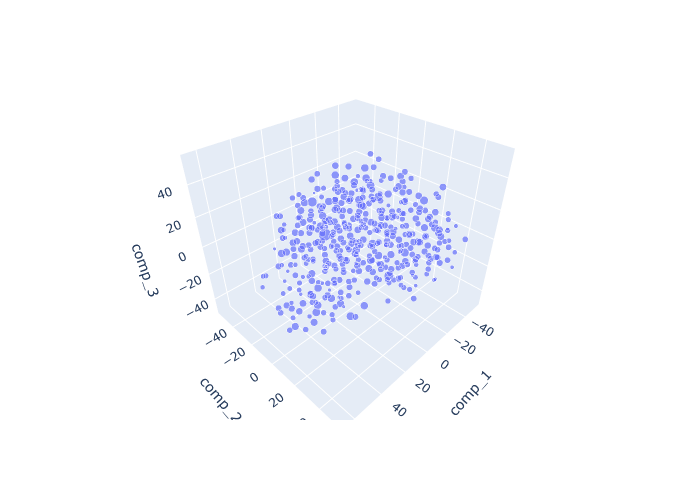

In [12]:
import plotly.express as px

fig = px.scatter_3d(df, x='comp_1', y='comp_2', z='comp_3',
                    size=df["len(lyrics)"])

fig.show("png")

In [13]:
from scipy.spatial import KDTree

def recommandation(song, nbr_of_song=3, coord=coord):
    song = coord.loc[song]
    kdtree=KDTree(coord)
    _, index =kdtree.query(song, k=nbr_of_song+1)
    for i in index[1:]:
        print("Song : ", df.iloc[i].name, " \nBy : ",  df.iloc[i].artist, "\n")

In [14]:
recommandation("Akta mannen")

Song :  AKTA MANNEN (Remix)  
By :  1.Cuz 

Song :  Rör Mig  
By :  Einár 

Song :  Tre Gringos  
By :  Just D 

